In [1]:
#importing useful libraries
import pandas as pd 
from bs4 import BeautifulSoup 
import urllib.request


In [2]:
url = 'https://getlatka.com/fav-companies'


In [3]:
page= urllib.request.urlopen(url)

In [4]:
 page.status      #chacking response

200

In [5]:
soup= BeautifulSoup(page,'html.parser')

In [6]:
soup.prettify   #html row data

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="en"><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><title>Which 3 companies do you care about the most?</title><meta content="You can always change these later" name="description"/><meta content="Which 3 companies do you care about the most?" property="og:title"/><meta content="You can always change these later" property="og:description"/><meta content="https://getlatka.com/assets/img/getlatka.png" property="og:image"/><meta content="Which 3 companies do you care about the most?" name="twitter:title"/><meta content="You can always change these later" name="twitter:description"/><meta content="https://getlatka.com/assets/img/getlatka.png" name="twitter:img:src"/><meta content="saas,b2b,private,data,company,business,ceo,ltv,cac,arpu,arr,mrr,churn,latka" name="keywords"/><link href="https://getlatka.com/assets/img/getlatka.png" rel="image_src" type="image/png"/><meta content="12" name="next-head-co

In [7]:
company= []  # creating a empty list 

In [8]:
company_name = soup.findAll('p',attrs={'class':'company-card_company-name__XjmEz'})

In [9]:
# creating a. For loop for appending the Name of company from the HTML data.
for data in company_name:
    name= data.text
    company.append(name)
    


In [10]:
company_funds=[]

In [11]:
cmp_data = soup.findAll('p',{'class':'company-card_data-value__z7ZOM'})
for i in cmp_data :
    namess= i.text
    company_funds.append(namess)

In [12]:
revenue= company_funds[0::3]  # extracting the revenue. From the row data

In [13]:
valuation= company_funds[1::3] # extracting the valuation values from the row data.

In [14]:
funding_rised= company_funds[2::3] # extracting the fun rised  values from the row data

In [15]:
# creating a new data frame using company revenue, valuation and fundraise.
data_fram= {'company':company,'revenue':revenue,'valuation':valuation,'funding_rised':funding_rised} 

In [16]:
final_data_frame= pd.DataFrame(data_fram)

In [17]:
final_data_frame # loading final data frame.

,company,revenue,valuation,funding_rised
0,Sendoso,$24M,$540M,$152.7M
1,Freshworks,$337.8M,$9.1B,$1.5B
2,Drift,$120M,$1B,$107M
3,Hotjar,$25M,$0,$0
4,Pendo,$100M,$2.6B,$469.6M
5,LeagueApps,$15M,$220M,$38.2M
6,Contentful,$58.4M,$3B,$349.6M
7,Typeform,$75M,$935M,$186.9M
8,Suzy,$40M,$400M,$119M
9,Gong,$120M,$7.3B,$583M


In [18]:
final_data_frame.to_json('file1.json', orient = 'split', compression = 'infer')  #saving data frame in json format

In [19]:
#recalling data from json file
df = pd.read_json('file1.json', orient ='split', compression = 'infer')
print(df)

                                              company  revenue valuation  \
0                                            Sendoso      $24M     $540M   
1                                         Freshworks   $337.8M     $9.1B   
2                                              Drift     $120M       $1B   
3                                             Hotjar      $25M        $0   
4                                              Pendo     $100M     $2.6B   
5                                         LeagueApps      $15M     $220M   
6                                         Contentful    $58.4M       $3B   
7                                           Typeform      $75M     $935M   
8                                               Suzy      $40M     $400M   
9                                               Gong     $120M     $7.3B   
10                                            Zapier     $140M       $5B   
11                                          Outreach     $158M     $4.2B   
12          

## data cleaning and analysis , and visualization

In [20]:
final_data_frame

,company,revenue,valuation,funding_rised
0,Sendoso,$24M,$540M,$152.7M
1,Freshworks,$337.8M,$9.1B,$1.5B
2,Drift,$120M,$1B,$107M
3,Hotjar,$25M,$0,$0
4,Pendo,$100M,$2.6B,$469.6M
5,LeagueApps,$15M,$220M,$38.2M
6,Contentful,$58.4M,$3B,$349.6M
7,Typeform,$75M,$935M,$186.9M
8,Suzy,$40M,$400M,$119M
9,Gong,$120M,$7.3B,$583M


In [21]:
#creating the function for eleminate the "$"  
def clean_data(val): 
    return val.replace("$","")   

In [22]:
final_data_frame['revenue']=final_data_frame['revenue'].map(clean_data)
final_data_frame['valuation']=final_data_frame['valuation'].map(clean_data)
final_data_frame['funding_rised']=final_data_frame['funding_rised'].map(clean_data)



In [23]:
final_data_frame

,company,revenue,valuation,funding_rised
0,Sendoso,24M,540M,152.7M
1,Freshworks,337.8M,9.1B,1.5B
2,Drift,120M,1B,107M
3,Hotjar,25M,0,0
4,Pendo,100M,2.6B,469.6M
5,LeagueApps,15M,220M,38.2M
6,Contentful,58.4M,3B,349.6M
7,Typeform,75M,935M,186.9M
8,Suzy,40M,400M,119M
9,Gong,120M,7.3B,583M


In [24]:
#now cleaning M,B,K .. lets convert all values in "k".. k will be base value

In [25]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'B' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif "K"== size[-1:]:
        x= size[:-1]
        x= float(x)
        return(x)
    else:
        return 0

In [26]:
final_data_frame["revenue"]=final_data_frame["revenue"].map(change_size)

In [27]:
final_data_frame['valuation']=final_data_frame['valuation'].map(change_size)

In [28]:
final_data_frame['funding_rised']=final_data_frame['funding_rised'].map(change_size)

In [29]:
final_data_frame  #all the values in multiple of '1000'

,company,revenue,valuation,funding_rised
0,Sendoso,24000.0,540000.0,152700.0
1,Freshworks,337800.0,9100000.0,1500000.0
2,Drift,120000.0,1000000.0,107000.0
3,Hotjar,25000.0,0.0,0.0
4,Pendo,100000.0,2600000.0,469600.0
5,LeagueApps,15000.0,220000.0,38200.0
6,Contentful,58400.0,3000000.0,349600.0
7,Typeform,75000.0,935000.0,186900.0
8,Suzy,40000.0,400000.0,119000.0
9,Gong,120000.0,7300000.0,583000.0


## top 10 companies by revanue

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [31]:
top_revenue= final_data_frame[['company','revenue']]

In [32]:
top_revenue=top_revenue.sort_values(by='revenue', ascending=False,ignore_index = True)

In [33]:
top_10_revenue = top_revenue.head(10)

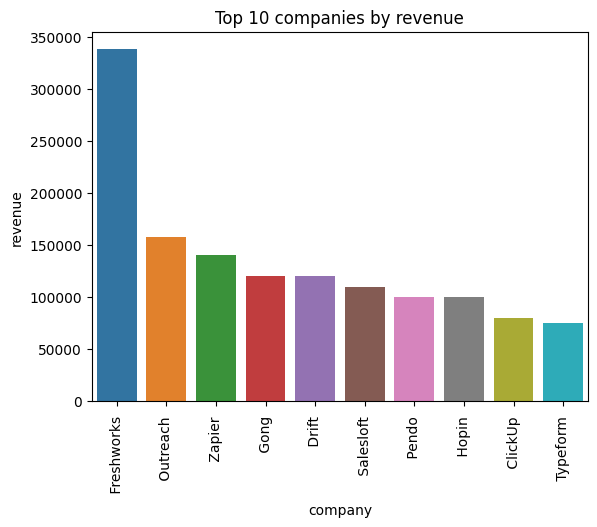

In [34]:
sns.barplot(data=top_10_revenue,x='company',y='revenue')
plt.xticks(rotation=90)
plt.title('Top 10 companies by revenue')
plt.show()

## Top 10 companies by valuation

In [35]:
top_valuations= final_data_frame[["company","valuation"]]

In [36]:
top_valuations=top_valuations.sort_values(by='valuation',ascending=False,ignore_index=True)

In [37]:
top_10_valuation = top_valuations.head(10)

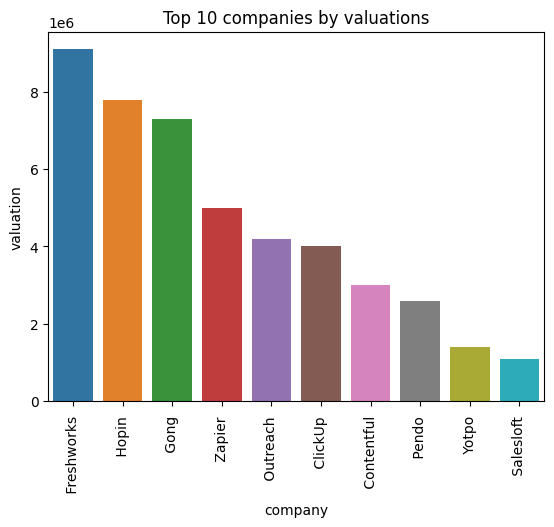

In [38]:
sns.barplot(data=top_10_valuation,x='company',y='valuation')
plt.xticks(rotation=90)
plt.title('Top 10 companies by valuations')
plt.show()

## Top 10 fund rised companies 

In [39]:
top_fund_rised = final_data_frame[['company','funding_rised']]

In [40]:
top_fund_rised= top_fund_rised.sort_values(by='funding_rised',ascending=False,ignore_index=True)

In [41]:
top_10_fund_rised= top_fund_rised.head(10)

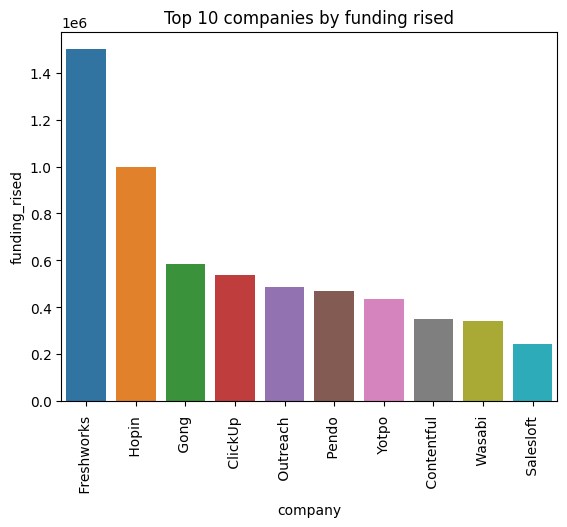

In [42]:
sns.barplot(data=top_10_fund_rised,x='company',y='funding_rised')
plt.xticks(rotation=90)
plt.title('Top 10 companies by funding rised')
plt.show()